<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria" align="center">Resume Screening using NLP+Different ML Algorithms</h1> 

**A summary of resume screening:**

- **1. Definition**: Resume screening is the process of determining whether a candidate is qualified for a role based his or her education, experience, and other information captured on their resume.

- **2. How to screen resumes**: First, screen resumes based on the job’s minimum qualifications. Second, screen resumes based on the job’s preferred qualifications. Third, screen resumes based on the shortlist of candidates you want to move onto the interview phase.

- **3. The challenges recruiters face while screening resumes**: The high volume of resumes received – up to 88% of them are unqualified – greatly increases time to fill. Recruiters face increased pressure to show quality of hire but lack tools to link their resume screening to post-hire metrics.

- **4. Tech innovations in resume screening**: Intelligent resume screening by using AI to learn from historical hiring decisions to improve quality of hire and reduce employee turnover.

<a href="https://ideal.com/resume-screening/#:~:text=Resume%20screening%20is%20the%20process,candidate%20based%20on%20their%20resume" target="_blank" rel="noopener noreferrer">Source</a> 

In this project, machine learning models is developed for the Resume Screening task.

<div class="list-group" id="list-tab" role="tablist">
        <h3 class="list-group-item list-group-item-action active" style="background-color:#1E90FF; color:white" data-toggle="list"  role="tab" aria-controls="home" style="font-family: Cambria">Notebook Content</h3>     
        <a class="list-group-item list-group-item-action list-group-item-info" data-toggle="list" href="#import" role="tab" aria-controls="profile" style="font-family: Cambria">Importing Basic Libraries and Loading Dataset<span class="badge badge-primary badge-pill" style="background-color:#1E90FF; color:white">1</span></a>      
        <a class="list-group-item list-group-item-action list-group-item-info" data-toggle="list" href="#understand" role="tab" aria-controls="profile" style="font-family: Cambria">Understanding Dataset<span class="badge badge-primary badge-pill" style="background-color:#1E90FF; color:white">2</span></a>
        <a class="list-group-item list-group-item-action list-group-item-info" data-toggle="list" href="#prep" role="tab" aria-controls="profile" style="font-family: Cambria">Preprocessing<span class="badge badge-primary badge-pill" style="background-color:#1E90FF; color:white">3</span></a>  
        <a class="list-group-item list-group-item-action list-group-item-info" data-toggle="list" href="#model" role="tab" aria-controls="profile" style="font-family: Cambria">Building Models<span class="badge badge-primary badge-pill" style="background-color:#1E90FF; color:white">4</span></a> 
        <a class="list-group-item list-group-item-action list-group-item-info" data-toggle="list" href="#cross" role="tab" aria-controls="profile" style="font-family: Cambria">Cross Validation for Models<span class="badge badge-primary badge-pill" style="background-color:#1E90FF; color:white">5</span></a> 

<a id='import'></a>
<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria">Importing Basic Libraries and Loading Dataset</h1> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('C:\\studies\\IIDT-Project\\UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<a id='understand'></a>
<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria">Understanding Dataset</h1> 

In [4]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].nunique()

25

In [9]:
categories = df['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


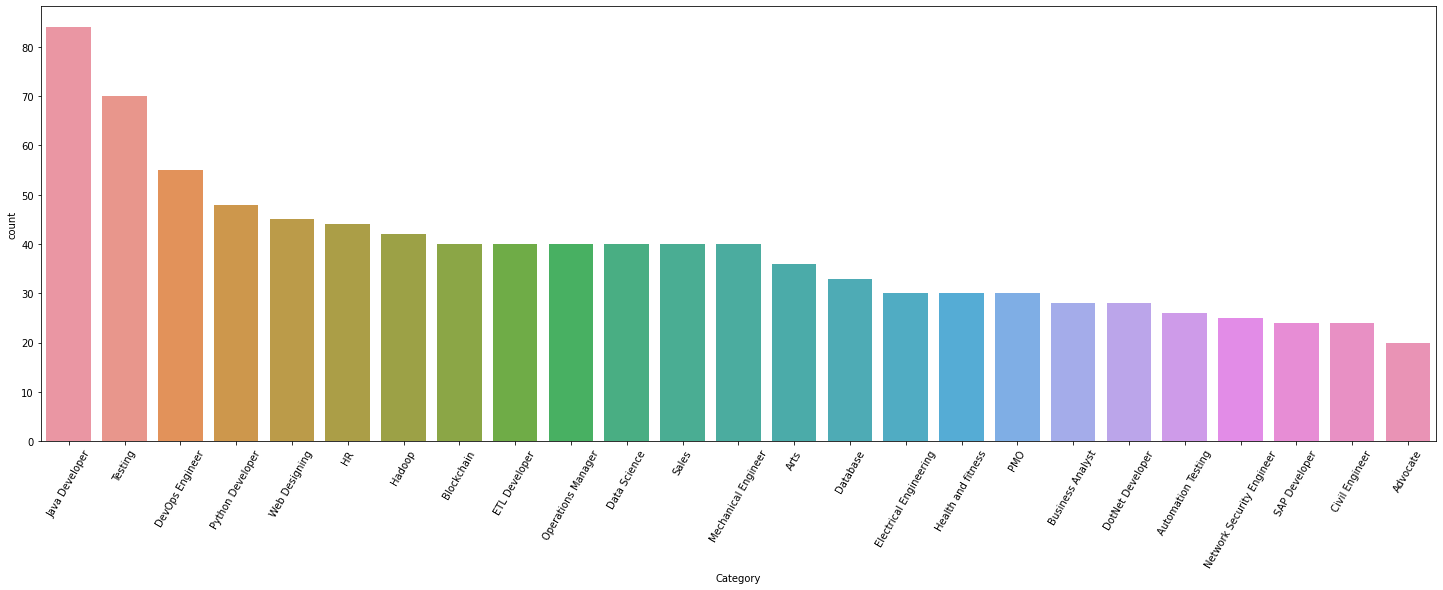

In [10]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
 
# Show the plot
plt.show()

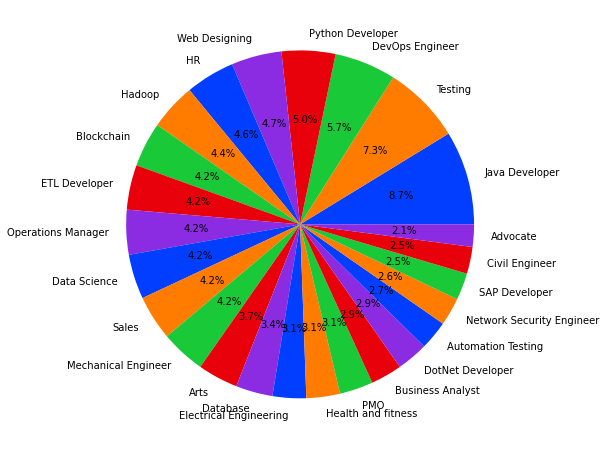

In [11]:
plt.figure(figsize=(25,8))

#define Seaborn color palette to use
colors= sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(categories['Category'], labels= categories['index'], colors = colors, autopct='%.1f%%')
plt.show()

<a id='prep'></a>
<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria">Preprocessing</h1> 

Let's create a helper function to remove URLs, hashtags, mentions, special letters and punctuation

Firstly, Let's add a new column for this:

In [12]:
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


Function:

In [13]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

Let's apply to columns:

In [14]:
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Let's encode the Category column:

In [15]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Let's create wordcloud:

In [21]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [23]:
#Stop words are generally the most common words in a language.
#English stop words from nltk:
nltk.download('stopwords')
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yalla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [24]:
totalWords= []

In [25]:
Sentences= df2['Resume'].values

In [26]:
cleanedSentences= ""

In [29]:
nltk.download('punkt')
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yalla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:


wordfreqdist = nltk.FreqDist(totalWords)

In [31]:
wordfreqdist

FreqDist({'Exprience': 7658, 'months': 6466, 'company': 6260, 'Details': 5934, 'description': 5268, '1': 4268, 'Project': 3616, 'project': 3158, '6': 2998, 'data': 2876, ...})

In [32]:
mostcommon = wordfreqdist.most_common(30)

In [33]:
mostcommon

[('Exprience', 7658),
 ('months', 6466),
 ('company', 6260),
 ('Details', 5934),
 ('description', 5268),
 ('1', 4268),
 ('Project', 3616),
 ('project', 3158),
 ('6', 2998),
 ('data', 2876),
 ('team', 2848),
 ('Maharashtra', 2770),
 ('year', 2488),
 ('Less', 2274),
 ('January', 2172),
 ('using', 2082),
 ('Skill', 2036),
 ('Pune', 2032),
 ('Management', 2020),
 ('SQL', 1980),
 ('Ltd', 1868),
 ('management', 1854),
 ('C', 1792),
 ('Engineering', 1710),
 ('Education', 1666),
 ('Developer', 1612),
 ('Java', 1546),
 ('2', 1508),
 ('development', 1504),
 ('monthsCompany', 1492)]

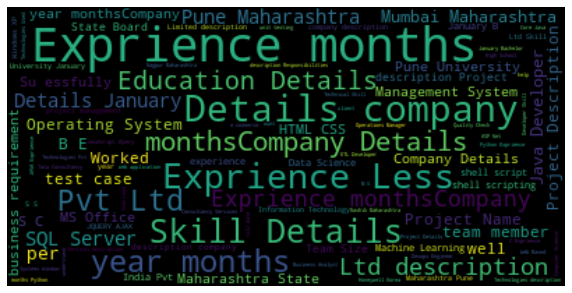

In [34]:
WordCloud= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='model'></a>
<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria">Building Models</h1>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [36]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

Here we will preprocess and convert the ‘cleaned_resume’ column into vectors. We will be using the ‘Tf-Idf’ method to get the vectors:

In [37]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

We have ‘WordFeatures’ as vectors and ‘Target’ and target after this step.

In [38]:
WordFeatures.shape

(962, 7351)

Let’s split the data into training and test set:

In [39]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


We have trained and tested the data and now let’s build the models:

In [41]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [43]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [44]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [45]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on t

In [46]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [47]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      0.7

<a id='cross'></a>
<h1 style="background-color:#1E90FF; color:white" style="font-family: Cambria">Cross Validation for Models</h1>

In [48]:
from sklearn.model_selection import cross_val_score, KFold

In [49]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [50]:
print("r2 scores")
print("*********************************")
for name, result in results.items():
   
    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.958
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.99
----------------
OneVsRestClassifier(estimator=SVC()) : 0.997
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.994
----------------


This project, it is showed how different machine learning algorithms could be applied for building a system such as a resume screening. 

The models just classified almost 1000 resumes in a few minutes into their respective categories with 99% accuracy.

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#1E90FF; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/drindeng/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/drindeng" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/turgay-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**